In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
m=40 
X0=np.ones((m,1))
X1=np.arange(1,m+1).reshape(m,1)
X=np.hstack((X0,X1))

In [3]:
X.shape[0]

40

In [4]:
# Y=np.array([
#     3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
#     11, 13, 13, 16, 17, 18, 17, 19, 21,
#     22,23,24,27,29,30,21,20,29,28
# ]).reshape(m,1)
Y=np.array([3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 
            12,11, 13, 13, 16, 17, 18, 17, 19, 21,
            22,23,24,27,29,30,21,20,29,28,
            31,32,33,35,36,37,38,39,42,40]).reshape(m,1)

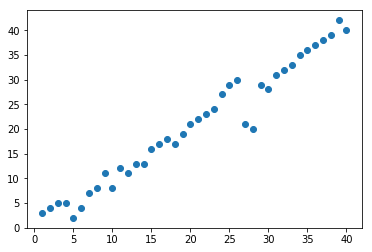

In [5]:
plt.scatter(X1,Y)

# 开始梯度下降计算参数

In [6]:
#梯度下降算法
def gradient_descent(x,y,alpha,threshold,maxIter):
    cnt=0
    loss={}
    theta=np.array([1,1]).reshape(2,1)
    gradient=gradient_func(x,y,theta)
    error=errors_func(x,y,theta)
    loss[cnt]=error[0][0]
    while not np.all(np.absolute(gradient) <= threshold) and cnt<maxIter:
        cnt=cnt+1
        theta=theta-alpha*gradient
        gradient=gradient_func(x,y,theta)
        error=errors_func(x,y,theta)
        loss[cnt]=error[0][0]
    print('迭代到第{}次，结束迭代！'.format(cnt))
    #画出loss函数
    lossdf=pd.DataFrame.from_dict(loss,orient='index')
    plt.plot(lossdf)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(labels=['loss'])
    plt.show()
    return theta,lossdf
    
#计算梯度的函数
def gradient_func(x,y,theta):
    diff=np.dot(x,theta)-y
    grad=(1.0/(x.shape[0]))*np.dot(np.transpose(x),diff)
    return grad
    
#计算损失的函数
def errors_func(x,y,theta):
    diff=np.dot(x,theta)-y
    error=(1.0/(2*x.shape[0]))*np.dot(np.transpose(diff),diff)
    return error

迭代到第81927次，结束迭代！


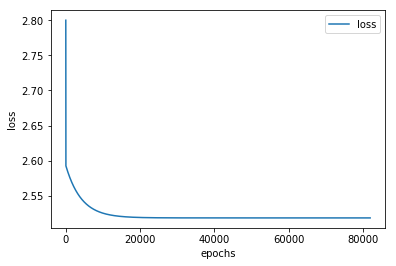

In [7]:
alpha=0.0005
thresh=1e-5
maxIter=100000
theta,lossdf=gradient_descent(X,Y,alpha,thresh,maxIter)

In [59]:
print("optimal theta:",theta[0][0],theta[1][0])

optimal theta: 0.2115800529911778 1.0018746315143365


In [8]:
Y_p=np.dot(X,theta)

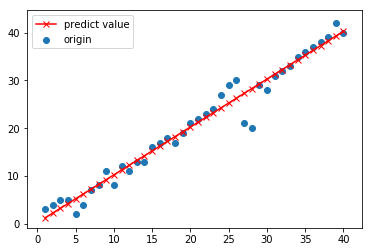

In [9]:
plt.plot(X1,Y_p,'r-x')
plt.scatter(X1,Y)
plt.legend(labels=['predict value','origin'])